In [2]:
import pandas as pd
car_data = pd.read_csv("car_price.csv")
car_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [ ]:
import pandas as pd
car_data = pd.read_csv("car_price.csv")
X = car_data[['year','km_driven','fuel','seller_type','transmission','owner']]
X

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,Petrol,Individual,Manual,First Owner
1,2007,50000,Petrol,Individual,Manual,First Owner
2,2012,100000,Diesel,Individual,Manual,First Owner
3,2017,46000,Petrol,Individual,Manual,First Owner
4,2014,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...
4335,2014,80000,Diesel,Individual,Manual,Second Owner
4336,2014,80000,Diesel,Individual,Manual,Second Owner
4337,2009,83000,Petrol,Individual,Manual,Second Owner
4338,2016,90000,Diesel,Individual,Manual,First Owner


In [4]:
import pandas as pd
car_data = pd.read_csv("car_price.csv")
X = car_data[['year','km_driven','fuel','seller_type','transmission','owner']]
y = car_data['selling_price']
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

In [9]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

car_data = pd.read_csv("car_price.csv")
car_data['fuel'] = car_data['fuel'].map({'Petrol':1, 'Diesel':0})
car_data['owner'] = car_data['owner'].map({'First Owner':1, 'Second Owner':2, 'Third Owner': 3})
car_data['seller_type'] = car_data['seller_type'].map({'Individual': 1, 'Dealer':0})
car_data['transmission'] = car_data['transmission'].map({'Manual': 0, 'Automatic': 1})

car_data.dropna(inplace=True)

X = car_data[['year','km_driven','fuel','seller_type','transmission','owner']]
y = car_data['selling_price']

model = KNeighborsRegressor(n_neighbors=10)
model.fit(X, y)

prediction = model.predict([[2010, 5000, 1, 1, 1, 1]])
prediction

C:\Users\goswa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([528999.9])

R2 score =  0.4621667648578548
Mean Absolute Error =  221471.39746732023
Mean Squared Error =  205263244634.8256


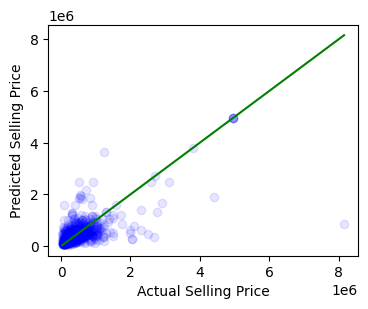

In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

car_data = pd.read_csv("car_price.csv")
car_data['fuel'] = car_data['fuel'].map({'Petrol':1, 'Diesel':0})
car_data['owner'] = car_data['owner'].map({'First Owner':1, 'Second Owner':2, 'Third Owner': 3})
car_data['seller_type'] = car_data['seller_type'].map({'Individual': 1, 'Dealer':0})
car_data['transmission'] = car_data['transmission'].map({'Manual': 0, 'Automatic': 1})

car_data.dropna(inplace=True)

X = car_data[['year','km_driven','fuel','seller_type','transmission','owner']]
y = car_data['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

r2 = r2_score(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)

print("R2 score = ", r2)
print("Mean Absolute Error = ", mae)
print("Mean Squared Error = ", mse)

plt.figure(figsize=(4,3))
plt.scatter(y_test, prediction, color='blue', alpha=0.1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.show()